# 1 - Regressao Linear Categórica

O dataset de hoje é o [Price Car](https://github.com/rmadan16/LinearRegression_CarPrice). Um dataset disponibilizado por [Rohit Madan](https://medium.com/@madanflies/linear-regression-on-carprice-dataset-or-encoding-a-categorical-dataset-in-linear-regression-7378f207e5c1). Para importar ele, basta utilizar o link: https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv' ou baixar o csv e fazer o upload no colab.

Ele contém a informação sobre a venda de carros usados e informações do carro como:
- Nome do carro
- Tipo de Combustível
- Número de portas
- Comprimento / Largura / Altura
- Outros variáveis
- Preço de venda

Nesse exercício apliquei o conceito de transformação categórica na coluna de **carbody** e desenvolvvi um modelo de Regressão Linear para avaliar seu desempenho.

## 1 - 0 Importação da bibliotecas

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression #Ref: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")


## 1 - 1 Criação do DataFrame filtragem da coluna

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df = df[['carbody','price']]

2 - 2 Distribuição do preço de acordo com o carbody

In [4]:
df[['carbody']].value_counts()

carbody    
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
dtype: int64

In [5]:
df.head()

,carbody,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0


In [6]:
df.isnull().sum()

carbody    0
price      0
dtype: int64

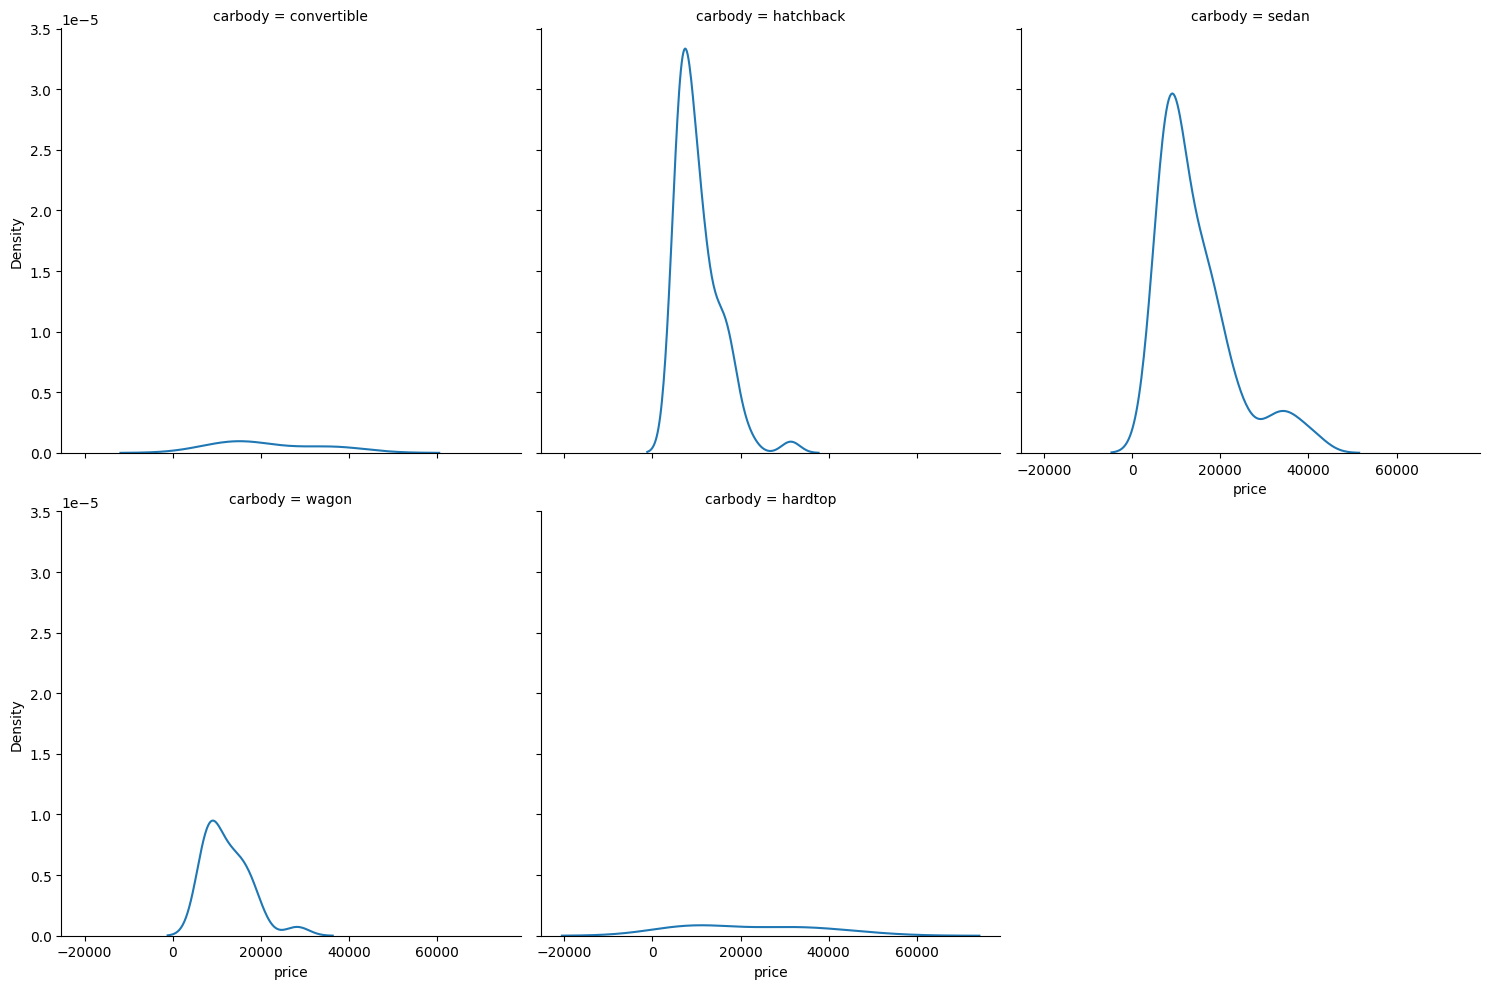

In [7]:
sns.displot(data = df,
            x = 'price',
            col = 'carbody',
            col_wrap = 3,
            kind = 'kde')

plt.show()

## 1 - 2 Transformações da variável categórica 

### Usando o get_dummies do pandas

In [8]:
df_tf = pd.get_dummies(df['carbody'])
df_tf['price'] = df['price']
df_tf.head()

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0


### Usando o OneHotEncoder

Nota o dataframe final deste modelo deve ser igual ao do get_dummies

In [9]:
## one hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df['carbody'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [10]:
df_tf = pd.DataFrame(enc.transform(df['carbody'].values.reshape(-1,1)).toarray().astype(int),columns=enc.categories_)
df_tf['price'] = df['price']
df_tf.head()

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0


In [11]:
df_tf.head()

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0


## 1 - 3 Treinamento e validação do modelo

### Separar Treino X Teste

In [12]:
# Separar os valores de atributo e alvo

X = df_tf.iloc[:,:-1]
y = df_tf[['price']]

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### Treinar modelo

In [13]:
# Chamar a função do Modelo para cada variável
LinReg1 = LinearRegression()

# Treinar o modelo

LinReg1.fit(X_train,y_train)

# Predizer os valores de teste

y_pred_1 = LinReg1.predict(X_test )


### Calcular métricas do modelo

In [14]:
# Calcular as métricas do modelo

print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))

Fórmula: y = [-7.99553279e+17] [7.99553279e+17 7.99553279e+17 7.99553279e+17 7.99553279e+17
 7.99553279e+17] x
MSE: 6326.487804878048
RMSE: 60651406.53658537
R²: 0.1367957083358693
